<a href="https://colab.research.google.com/github/Luseat/KlasifikasiRnadomForest/blob/main/Loan_Approval_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix,accuracy_score,roc_curve,classification_report
import seaborn as sns
%matplotlib inline
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

In [ ]:
url = "https://raw.githubusercontent.com/Luseat/KlasifikasiRnadomForest/refs/heads/main/loan_approval_dataset.csv"
df = pd.read_csv(url)



### **Exploratory Data Analysis (EDA)**

In [ ]:
df


,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,1,2,Graduate,No,9600000,29900000,12,778,2400000,17600000,22700000,8000000,Approved
1,2,0,Not Graduate,Yes,4100000,12200000,8,417,2700000,2200000,8800000,3300000,Rejected
2,3,3,Graduate,No,9100000,29700000,20,506,7100000,4500000,33300000,12800000,Rejected
3,4,3,Graduate,No,8200000,30700000,8,467,18200000,3300000,23300000,7900000,Rejected
4,5,5,Not Graduate,Yes,9800000,24200000,20,382,12400000,8200000,29400000,5000000,Rejected
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4264,4265,5,Graduate,Yes,1000000,2300000,12,317,2800000,500000,3300000,800000,Rejected
4265,4266,0,Not Graduate,Yes,3300000,11300000,20,559,4200000,2900000,11000000,1900000,Approved
4266,4267,2,Not Graduate,No,6500000,23900000,18,457,1200000,12400000,18100000,7300000,Rejected
4267,4268,1,Not Graduate,No,4100000,12800000,8,780,8200000,700000,14100000,5800000,Approved


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4269 entries, 0 to 4268
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   loan_id                    4269 non-null   int64 
 1    no_of_dependents          4269 non-null   int64 
 2    education                 4269 non-null   object
 3    self_employed             4269 non-null   object
 4    income_annum              4269 non-null   int64 
 5    loan_amount               4269 non-null   int64 
 6    loan_term                 4269 non-null   int64 
 7    cibil_score               4269 non-null   int64 
 8    residential_assets_value  4269 non-null   int64 
 9    commercial_assets_value   4269 non-null   int64 
 10   luxury_assets_value       4269 non-null   int64 
 11   bank_asset_value          4269 non-null   int64 
 12   loan_status               4269 non-null   object
dtypes: int64(10), object(3)
memory usage: 433.7+ KB


In [ ]:
df.describe()

,loan_id,no_of_dependents,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value
count,4269.000000,4269.000000,4.269000e+03,4.269000e+03,4269.000000,4269.000000,4.269000e+03,4.269000e+03,4.269000e+03,4.269000e+03
mean,2135.000000,2.498712,5.059124e+06,1.513345e+07,10.900445,599.936051,7.472617e+06,4.973155e+06,1.512631e+07,4.976692e+06
std,1232.498479,1.695910,2.806840e+06,9.043363e+06,5.709187,172.430401,6.503637e+06,4.388966e+06,9.103754e+06,3.250185e+06
min,1.000000,0.000000,2.000000e+05,3.000000e+05,2.000000,300.000000,-1.000000e+05,0.000000e+00,3.000000e+05,0.000000e+00
25%,1068.000000,1.000000,2.700000e+06,7.700000e+06,6.000000,453.000000,2.200000e+06,1.300000e+06,7.500000e+06,2.300000e+06
50%,2135.000000,3.000000,5.100000e+06,1.450000e+07,10.000000,600.000000,5.600000e+06,3.700000e+06,1.460000e+07,4.600000e+06
75%,3202.000000,4.000000,7.500000e+06,2.150000e+07,16.000000,748.000000,1.130000e+07,7.600000e+06,2.170000e+07,7.100000e+06
max,4269.000000,5.000000,9.900000e+06,3.950000e+07,20.000000,900.000000,2.910000e+07,1.940000e+07,3.920000e+07,1.470000e+07


In [ ]:
df.isna().sum()*100/len(df)

,0
loan_id,0.0
no_of_dependents,0.0
education,0.0
self_employed,0.0
income_annum,0.0
loan_amount,0.0
loan_term,0.0
cibil_score,0.0
residential_assets_value,0.0
commercial_assets_value,0.0


In [ ]:
print(df.columns)

Index(['loan_id', ' no_of_dependents', ' education', ' self_employed',
       ' income_annum', ' loan_amount', ' loan_term', ' cibil_score',
       ' residential_assets_value', ' commercial_assets_value',
       ' luxury_assets_value', ' bank_asset_value', ' loan_status'],
      dtype='object')


 education
Graduate        2144
Not Graduate    2125
Name: count, dtype: int64


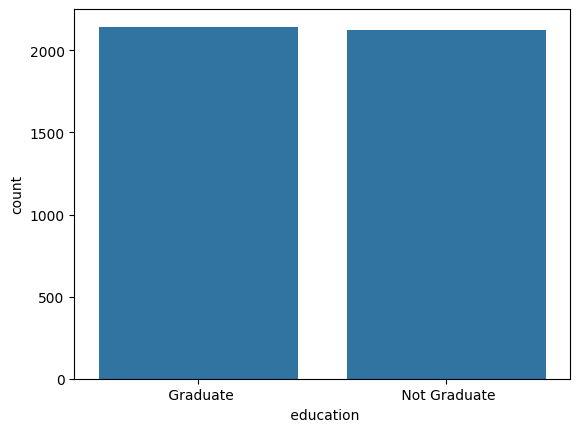

In [ ]:
sns.countplot(x = df[' education'])
print(df[' education'].value_counts())

In [ ]:
df[' education'].mode()[0]

' Graduate'

In [ ]:
df[' education'] = df[' education'].fillna(df[' education'].mode()[0])

 no_of_dependents
4    752
3    727
0    712
2    708
1    697
5    673
Name: count, dtype: int64


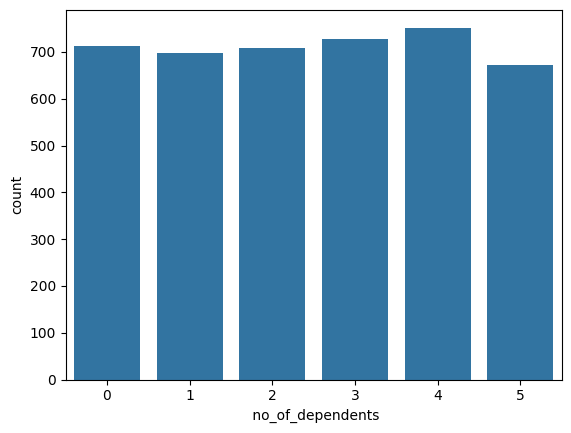

In [ ]:
sns.countplot(x = df[' no_of_dependents'])
print(df[' no_of_dependents'].value_counts())

In [ ]:
df[' no_of_dependents'].mode()[0]

4

In [ ]:
df[' no_of_dependents'] = df[' no_of_dependents'].fillna(df[' no_of_dependents'].mode()[0])

 self_employed
Yes    2150
No     2119
Name: count, dtype: int64


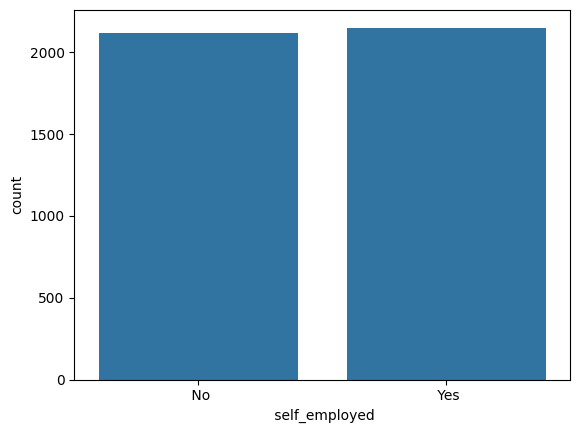

In [ ]:
sns.countplot(x = df[' self_employed'])
print(df[' self_employed'].value_counts())

In [ ]:
df[' self_employed'].mode()[0]

' Yes'

In [ ]:
df[' self_employed'] = df[' self_employed'].fillna(df[' self_employed'].mode()[0])

In [ ]:
df[' loan_amount'].median()

14500000.0

In [ ]:
df[' loan_amount'] = df[' loan_amount'].fillna(df[' loan_amount'].median())

 loan_term
6     490
12    456
4     447
10    436
18    422
16    412
20    411
14    405
2     404
8     386
Name: count, dtype: int64


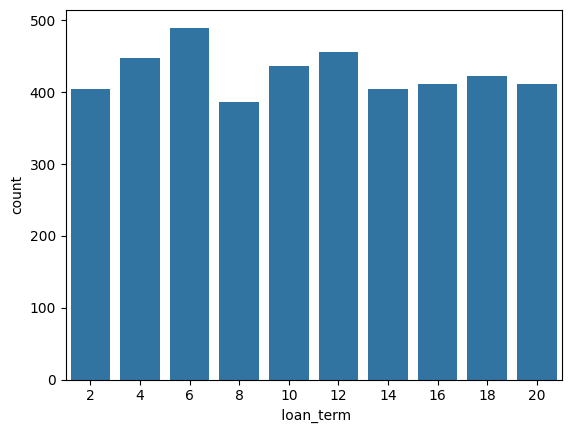

In [ ]:
sns.countplot(x = df[' loan_term'])
print(df[' loan_term'].value_counts())

In [ ]:
df[' loan_term'].mode()[0]

6

In [ ]:
df[' loan_term'] = df[' loan_term'].fillna(df[' loan_term'].mode()[0])

# **Feature Creation**

In [ ]:
df.head()

,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,1,2,Graduate,No,9600000,29900000,12,778,2400000,17600000,22700000,8000000,Approved
1,2,0,Not Graduate,Yes,4100000,12200000,8,417,2700000,2200000,8800000,3300000,Rejected
2,3,3,Graduate,No,9100000,29700000,20,506,7100000,4500000,33300000,12800000,Rejected
3,4,3,Graduate,No,8200000,30700000,8,467,18200000,3300000,23300000,7900000,Rejected
4,5,5,Not Graduate,Yes,9800000,24200000,20,382,12400000,8200000,29400000,5000000,Rejected


In [ ]:
df.columns = df.columns.str.strip()
df['education'] = df['education'].str.strip()

df.columns = df.columns.str.strip()
df['loan_status'] = df['loan_status'].str.strip()




In [ ]:
print(df['self_employed'].unique())

[' No' ' Yes']


In [ ]:
df.replace({
    "loan_status": {'Rejected': 0, 'Approved': 1},
    "education": {'Not Graduate': 0, 'Graduate': 1},
    "self-employed": {' No': 0, ' Yes': 1,}
}, inplace=True)

In [ ]:
df['self_employed'] = df['self_employed'].replace({' No': 0, ' Yes': 1})
print(df['self_employed'].unique())

[0 1]


In [ ]:
print(df.columns)

Index(['loan_id', 'no_of_dependents', 'education', 'self_employed',
       'income_annum', 'loan_amount', 'loan_term', 'cibil_score',
       'residential_assets_value', 'commercial_assets_value',
       'luxury_assets_value', 'bank_asset_value', 'loan_status'],
      dtype='object')


In [ ]:
df


,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,1,2,1,0,9600000,29900000,12,778,2400000,17600000,22700000,8000000,1
1,2,0,0,1,4100000,12200000,8,417,2700000,2200000,8800000,3300000,0
2,3,3,1,0,9100000,29700000,20,506,7100000,4500000,33300000,12800000,0
3,4,3,1,0,8200000,30700000,8,467,18200000,3300000,23300000,7900000,0
4,5,5,0,1,9800000,24200000,20,382,12400000,8200000,29400000,5000000,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4264,4265,5,1,1,1000000,2300000,12,317,2800000,500000,3300000,800000,0
4265,4266,0,0,1,3300000,11300000,20,559,4200000,2900000,11000000,1900000,1
4266,4267,2,0,0,6500000,23900000,18,457,1200000,12400000,18100000,7300000,0
4267,4268,1,0,0,4100000,12800000,8,780,8200000,700000,14100000,5800000,1


## **Train Test Split The Data**

In [ ]:
def train_test_split_and_features(df):
    y = df["loan_status"]
    x = df.drop(['loan_status', 'loan_id'], axis=1)
    x = pd.get_dummies(data = x, columns = ["bank_asset_value","no_of_dependents"]) #parameter
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state = 0)
    print(x.head(10))
    print(x.columns)
    features = list(x.columns)
    return x_train, x_test, y_train, y_test,features

In [ ]:
x_train, x_test, y_train, y_test,features = train_test_split_and_features(df)

   education  self_employed  income_annum  loan_amount  loan_term  \
0          1              0       9600000     29900000         12   
1          0              1       4100000     12200000          8   
2          1              0       9100000     29700000         20   
3          1              0       8200000     30700000          8   
4          0              1       9800000     24200000         20   
5          1              1       4800000     13500000         10   
6          1              0       8700000     33000000          4   
7          1              1       5700000     15000000         20   
8          1              1        800000      2200000         20   
9          0              0       1100000      4300000         10   

   cibil_score  residential_assets_value  commercial_assets_value  \
0          778                   2400000                 17600000   
1          417                   2700000                  2200000   
2          506                   

In [ ]:
def fit_and_evaluate_model(x_train, x_test, y_train, y_test):
    random_forest =  RandomForestClassifier(random_state=0,\
                                            max_depth=5,\
                                            min_samples_split= 0.01,\
                                            max_features= 0.8,
                                            max_samples= 0.8)

    model = random_forest.fit(x_train, y_train)
    random_forest_predict = random_forest.predict(x_test)
    random_forest_conf_matrix = confusion_matrix(y_test, random_forest_predict)
    random_forest_acc_score = accuracy_score(y_test, random_forest_predict)
    print("confussion matrix")
    print(random_forest_conf_matrix)
    print("\n")
    print("Accuracy of Random Forest:",random_forest_acc_score*100,'\n')
    print(classification_report(y_test,random_forest_predict))
    return model

In [ ]:
model = fit_and_evaluate_model(x_train, x_test, y_train, y_test)

confussion matrix
[[316  15]
 [ 10 513]]


Accuracy of Random Forest: 97.07259953161592 

              precision    recall  f1-score   support

           0       0.97      0.95      0.96       331
           1       0.97      0.98      0.98       523

    accuracy                           0.97       854
   macro avg       0.97      0.97      0.97       854
weighted avg       0.97      0.97      0.97       854



In [ ]:
importances = pd.DataFrame(model.feature_importances_)
importances['features'] = features
importances.columns = ['importance','feature']
importances.sort_values(by = 'importance', ascending= True,inplace=True)


### **Feature Importance**

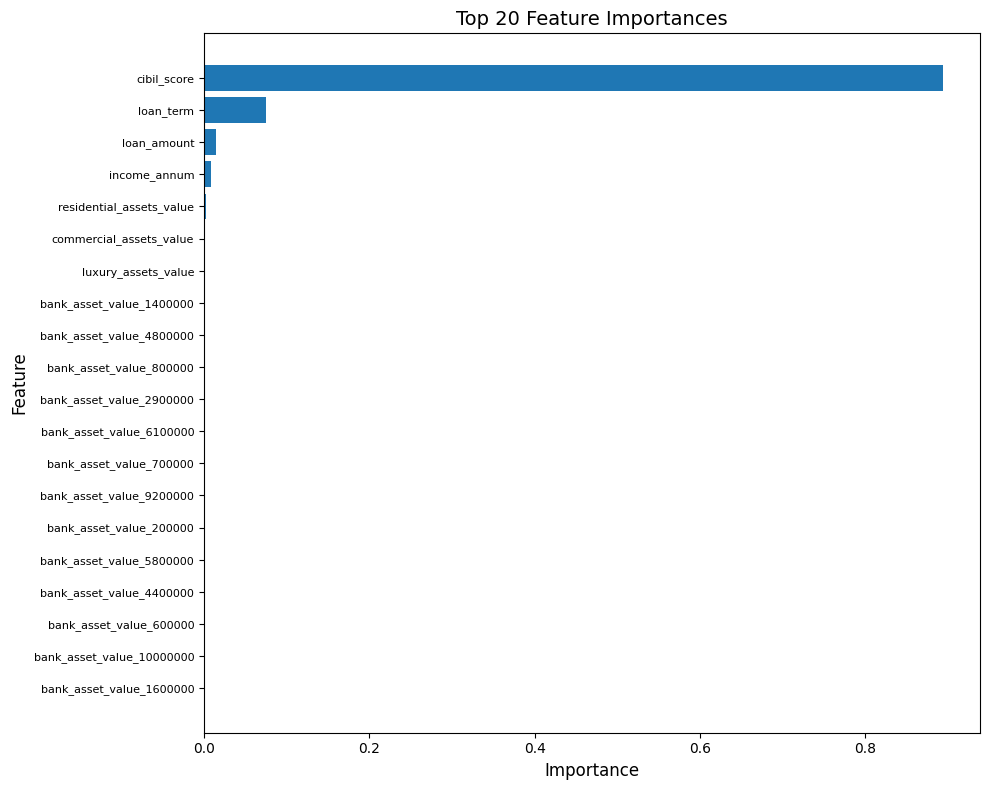

In [ ]:

# Urutkan berdasarkan nilai 'importance' (descending)
importances_sorted = importances.sort_values(by="importance", ascending=False)

# Pilih fitur teratas (misalnya, 20 fitur teratas)
top_features = importances_sorted.head(20)

# Plot ulang dengan fitur paling penting di atas
plt.figure(figsize=(10, 8))  # Lebar 10, Tinggi 8
plt.barh(top_features.feature[::-1], top_features.importance[::-1])  # Balik urutan agar yang terbesar di atas
plt.tick_params(axis='y', labelsize=8)
plt.xlabel("Importance", fontsize=12)
plt.ylabel("Feature", fontsize=12)
plt.title("Top 20 Feature Importances", fontsize=14)
plt.tight_layout()
plt.show()

In [ ]:
rf_proba = model.predict_proba(x_test)
rf_predict = model.predict(x_test)
print(rf_proba[0:10])
print(rf_predict)

[[1.91759985e-04 9.99808240e-01]
 [8.59519784e-05 9.99914048e-01]
 [5.57770615e-04 9.99442229e-01]
 [1.00000000e+00 0.00000000e+00]
 [7.47154283e-01 2.52845717e-01]
 [1.00000000e+00 0.00000000e+00]
 [8.59519784e-05 9.99914048e-01]
 [1.91759985e-04 9.99808240e-01]
 [1.91759985e-04 9.99808240e-01]
 [1.00000000e+00 0.00000000e+00]]
[1 1 1 0 0 0 1 1 1 0 1 1 0 0 0 1 1 1 1 1 1 1 0 1 1 0 0 1 1 1 0 1 1 0 1 0 1
 1 1 1 1 0 1 1 0 1 1 0 0 1 1 1 1 1 0 1 0 1 1 0 1 1 0 1 0 0 0 1 1 1 1 1 1 0
 1 0 1 1 0 0 0 1 1 1 1 0 1 0 1 1 1 0 1 0 1 1 0 1 1 1 1 1 1 1 1 1 1 1 0 1 1
 0 0 1 1 0 1 0 1 0 1 1 0 0 1 0 1 1 1 1 1 0 0 0 0 0 0 0 0 1 1 1 1 1 0 0 0 0
 1 1 1 0 1 1 1 0 1 0 1 1 0 1 1 0 1 0 1 1 1 1 0 1 1 1 1 0 1 1 1 1 1 0 1 1 1
 0 1 1 1 1 1 0 1 0 1 0 0 0 1 1 0 0 0 1 1 1 0 1 1 1 1 0 0 1 1 1 1 1 1 0 0 1
 1 0 1 1 1 0 1 1 0 1 0 1 0 1 1 0 1 1 0 1 1 0 1 1 1 1 0 1 0 1 0 0 1 0 1 1 1
 0 0 1 0 0 1 1 0 0 1 1 1 0 0 1 1 1 1 1 0 0 0 0 0 1 0 0 0 0 1 1 0 1 1 0 1 1
 1 0 0 1 1 0 1 1 0 1 1 1 1 0 1 1 1 0 1 1 0 0 1 0 0 0 1 1 1 1 1 1 1 1 